<a href="https://colab.research.google.com/github/milowia/python_wagon/blob/main/Access_Data_4_Competitor_web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 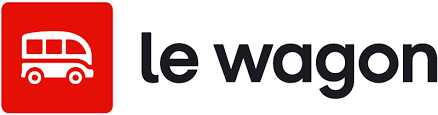

# Get competitor's products and prices info

Naturalia is a health food French company, and one of the main competitors of Greenweez.

In this challenge, you will gather information on Naturalia products to help Greenweez drive its pricing strategy.

## Naturalia website

### BeautifulSoup


Go to the [website](https://www.naturalia.fr/catalogsearch/result/?q=compote) and study the url. What is the endpoint? What is the query parameter ?

endpoint: https://www.naturalia.fr/catalogsearch/result

parameter: q=compote


Using `requests` and `bs4`libraries, convert the html code to a BeautifulSoup object and store it in a `soup`variable.

Have a look at the lecture if you're unsure about the syntax.

In [2]:
#Using requests and bs4libraries,
import requests
response = requests.get('https://www.naturalia.fr/catalogsearch/result/?q=compote')

from bs4 import BeautifulSoup

#convert the html code to a BeautifulSoup object and store it in a soupvariable
soup = BeautifulSoup(response.text, 'html.parser')


### Investigating the page layout


We want to get information about all the products displayed on the page.

By examining the website's HTML code, determine the HTML tag that contains information for each product.

li




Use BeautifulSoup's `find_all()` method to retrieve all **li** tags with the class **item product product-item** and store the results in a variable named `items`.

Have a look at the lecture for guidance.

In [7]:
items = soup.find_all("li", {"class": "item product product-item"})
type(items)

bs4.element.ResultSet

What is the type of `items`?






List



### Scraping one product information


Store the first item in a variable named `item`.

In [8]:
item = items[0]
item

<li class="item product product-item"> <div class="product-item-info" data-container="product-grid">
<p class="product name product-item-name">
<a class="product-item-link" href="https://www.naturalia.fr/catalog/product/view/id/94497/s/gourde-puree-pomme-120g/category/2/">
                                                        Purée de pommes en gourde 120g Bio                         </a>
</p>
<p class="product-item-brand">
                        Popote                    </p>
<div class="products-content">
<div class="product-item-photo">
<p class="banner discount percent-15">-17%</p>
<a class="product photo" href="https://www.naturalia.fr/catalog/product/view/id/94497/s/gourde-puree-pomme-120g/category/2/" tabindex="-1">
<span class="product-image-container product-image-container-94497">
<span class="product-image-wrapper">
<img alt="Purée de pommes en gourde 120g Bio " class="product-image-photo" height="233" loading="lazy" src="https://media.naturalia.fr/media/catalog/product/c

HTML can be tough to decipher when reading it in the notebook.

Use your browser's console to identify the HTML tag storing the product information (name and url) of the first item. \
Extract it with BeautifulSoup and store the results in a variable named `item_description`.

In [12]:
item_description = item.find('a', class_="product-item-link")
item_description

<a class="product-item-link" href="https://www.naturalia.fr/catalog/product/view/id/94497/s/gourde-puree-pomme-120g/category/2/">
                                                        Purée de pommes en gourde 120g Bio                         </a>

Now extract the name and url from `item_description`and store them in two variables named `item_name` and `item_url`.


In [32]:
#store the product name
item_name = item_description.string.strip()
item_name

'Purée de pommes en gourde 120g Bio'

In [30]:
#store the product url
item_url = item_description.get('href')
item_url

'https://www.naturalia.fr/catalog/product/view/id/94497/s/gourde-puree-pomme-120g/category/2/'

Repeat the same process to extract the price of the first item, and store it in a variable named `item_price`.


<details>
    <summary>Hint 🔍</summary>

You will be required to do some cleaning with the output, including:
    
- get rid of the unnecessary characters (`strip()`and `replace()` methods can help)
- change the data type

</details>

In [38]:
item_price = item.find('span', class_='price-wrapper').get('data-price-amount')
item_price

'1.45'

### Scraping all products information

We will now repeat the process to gather the information of all the products displayed on the page.

By re-using your previous code, iterate over all the products and create a list of dictionaries containg all the products information (product name, price and url).

Complete the following code and execute it.

In [39]:
import pandas as pd

# all products info
products = []

# iterate over items
for item in items:

    # to be completed
    item_description = item.find('a', class_="product-item-link")

    # product_info dict
    products_info = {'product_name': item_description.string.strip(), 'price': item.find('span', class_='price-wrapper').get('data-price-amount'), 'url': item_description.get('href')}

    # append product_info to products
    products.append(products_info)

df = pd.DataFrame(products)
df

,product_name,price,url
0,Purée de pommes en gourde 120g Bio,1.45,https://www.naturalia.fr/catalog/product/view/...
1,Gourde de Figue dès 6M 120g Bio,2.29,https://www.naturalia.fr/produit/grde-figue-120g
2,Gourde de Mirabelle dès 6M 120g Bio,2.29,https://www.naturalia.fr/produit/grde-mirabell...
3,Gourde de Fraise dès 6M 120g Bio,1.99,https://www.naturalia.fr/produit/grde-fraise-120g
4,Gourde de Myrtilles dès 4M 120g Bio,2.35,https://www.naturalia.fr/produit/grde-myrtille...
5,Gourde d'Abricot dès 4M 120g Bio,1.9,https://www.naturalia.fr/produit/grde-abricot-...
6,Compote Fraise 315g Bio,5.4,https://www.naturalia.fr/produit/compote-frais...
7,Compote Rhubarbe 725G Bio,8.39,https://www.naturalia.fr/produit/compote-rhuba...
8,Compote de Pêche allégée 540g Bio,7.49,https://www.naturalia.fr/produit/compote-peche...
9,Compote de Pêche 725G Bio,8.95,https://www.naturalia.fr/produit/compote-peche...


Congratulations! You just scraped your first web page using Python! 🤖

---

Did we scrape all the products though ?


> **Your Answer Here (Double click)**


### Scraping all the pages

Use your web browser inspector to identify the HTML tag containing the URL for the next page. \
Store this in a variable named `next_page_item`

In [47]:
next_page_item = soup.find('a', class_="action next")
next_page_item

<a class="action next" href="https://www.naturalia.fr/catalogsearch/result/index/?p=2&amp;q=compote" title="Suivant">
<i aria-hidden="true" class="fa fa-chevron-circle-right"></i>
</a>

Now extract the URL from it and store it in a variable named `next_page_url`.

In [48]:
next_page_url = next_page_item.get('href')
next_page_url

'https://www.naturalia.fr/catalogsearch/result/index/?p=2&q=compote'

Now try to repeat the `next_page_item`instructions **on the last page**. Does it work ?

In [49]:
last_page = requests.get('https://www.naturalia.fr/catalogsearch/result/index/?p=4&q=compote')
soup = BeautifulSoup(last_page.text, 'html.parser')
next_page_item = soup.find('a', class_="action next")
next_page_url = next_page_item.get('href')
next_page_url


AttributeError: 'NoneType' object has no attribute 'get'

> **Your Answer Here (Double click)**


There is no "Next page" button on the last page (obviously). Therefore, when we try to locate it, the`find()` method outputs a None value.

We can actually use that to our advantage in a `while`loop !


---

**Hard Mode**

By re-using all of the previous steps, create a final function that will take a `search_term` as a parameter (like we did with "compote") and will return a DataFrame containing products information from all the pages.


<details>
    <summary>Hint 🔍 </summary>

You can use a while loop to iterate over pages until there is no next page anymore.

</details>

In [57]:
def naturalia_web_scraper(search_term):

    url = "https://www.naturalia.fr/catalogsearch/result/?q=" + search_term

    next_page = True

    #all products info stored in a list called products

    products=[]

    while(next_page): #as long as there is a next page, the loop will iterate

        #get items
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        items = soup.find_all("li", {"class": "item product product-item"})

        # iterate over items
        for item in items:

            # product_info dict
            item_description = item.find('a', class_="product-item-link")
            products_info = {'product_name': item_description.string.strip(),
                             'price': item.find('span', class_='price-wrapper').get('data-price-amount'),
                             'url': item_description.get('href')
                             }

            # append product_info to products
            products.append(products_info)


            # test for next page
            next_page = soup.find('a', class_="action next")
            # check if next_page exists before trying to get the href
            if next_page:
              url = next_page.get('href')
            else:
              break


    # combine all products in a single DataFrame
    df = pd.DataFrame(products)

    return df


#test your function

naturalia_web_scraper("compote")


,product_name,price,url
0,Purée de pommes en gourde 120g Bio,1.45,https://www.naturalia.fr/catalog/product/view/...
1,Gourde de Figue dès 6M 120g Bio,2.29,https://www.naturalia.fr/produit/grde-figue-120g
2,Gourde de Mirabelle dès 6M 120g Bio,2.29,https://www.naturalia.fr/produit/grde-mirabell...
3,Gourde de Fraise dès 6M 120g Bio,1.99,https://www.naturalia.fr/produit/grde-fraise-120g
4,Gourde de Myrtilles dès 4M 120g Bio,2.35,https://www.naturalia.fr/produit/grde-myrtille...
...,...,...,...
68,Purée Pommes Demeter sans sucres format Family...,4.99,https://www.naturalia.fr/produit/puree-pommes-...
69,Purée de poires sans sucres format Family 910g...,7.25,https://www.naturalia.fr/produit/puree-poires-...
70,Purée de pommes cannelle Demeter sans sucres 3...,3.79,https://www.naturalia.fr/produit/puree-pomme-c...
71,Ananas morceaux 240g Bio,5.35,https://www.naturalia.fr/produit/bocal-ananas-...


Congratulations ! 🎉

## Bonus: Scraping Walmart ?



Imagine we want to scrape product information from [this url](https://www.walmart.ca/parcourir/epicerie/collations-bonbons/coupes-compote-pommes-puree-fruits/10019-6000194328523-6000195492964) now.

Run the following line of code.

In [58]:
url = "https://www.walmart.ca/fr/browse/epicerie/collations-bonbons/coupes-compote-pommes-puree-fruits/10019_6000194328523_6000195492964"

response = requests.get(url)
response.text

'<!DOCTYPE html>\n<html lang=en><head> <meta charset=utf-8 /> <meta name=viewport content="width=device-width, initial-scale=1"/> <title>Verify Your Identity</title>  <script>function getUrlVars(){var vars={};var parts=window.location.href.replace(/[?&]+([^=&]+)=([^&]*)/gi,function(m,key,value){vars[key]=value;});return vars;}\nfunction getUrlParam(parameter,defaultvalue){var urlparameter=defaultvalue;if(window.location.href.indexOf(parameter)>-1){urlparameter=getUrlVars()[parameter];}\nreturn urlparameter;}\nfunction sanitizeUuid(uuid){var regex=new RegExp("^\\\\b[0-9a-f]{8}\\\\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\\\\b[0-9a-f]{12}\\\\b$","g");var match=regex.exec(uuid);return match!=null?uuid:"";}\nfunction addBlockID(){var blockId=sanitizeUuid(getUrlParam(\'uuid\',\'\'));document.getElementById("blockId1").innerHTML="ID: "+blockId;}\nfunction getCookie(name){var cookieArr=document.cookie.split(";");for(var i=0;i<cookieArr.length;i++){var cookiePair=cookieArr[i].split("=");if(name==

We cannot use BeautifulSoup, because Walmart is using an anti Web Scraping system, which messes with the HTML parsing.

We would need some advanced scraping libraries such as [Selenium](https://www.selenium.dev/) to proceed (more on that during the recap).
